In [1]:
import math
from scipy import integrate
import numpy as np

## Categorical distribution

__Bernoulli distribution__의 일반화  

서로 다른 $K$개의 값들 중 하나를 취할 수 있는 이산 확률 변수 $\mathrm{x}$에 대한 분포.  

변수가 $K$차원의 벡터 $\mathrm{x}$로 나타나며 $x_{k}$값들 중 하나는 1, 나머지는 0으로 설정.

예) 여섯개의 상태를 가질 수 있는 변수가 $x_{3}=1$이라는 상태를 가졌다면 $\mathrm{x}=(0, 0, 1, 0, 0, 0)^{T}$




- $\Sigma_{k=1}^{K} x_{k} = 1$

- pmf: $$p(\mathrm{x}|\mathrm{\mu}) = \Pi_{k=1}^K \mu_k^{x_k}
= \sum_{k=1}^K \mu_k\cdot x_k  ,$$ $\mu_k: x_k=1$ 일 확률  
$\mu_k \geq0$, $\Sigma_{k=1}^{K} \mu_{k} = 1$
 

In [2]:
def categorical_pmf(x, mu):
    return sum(x[i]*mu[i] for i in range(len(x)))

In [3]:
x = [0,1,0,0]
mu = [0.1, 0.2, 0.3, 0.4]

In [4]:
categorical_pmf(x, mu)

0.2

## Multinomial distribution

binomial distribution의 일반화.  
data set $\mathcal{D} = \{\mathrm{x}_1, \mathrm{x}_2, ... , \mathrm{x}_N\}$ 

$$p(\mathcal{D|\mu}) =\Pi_{n=1}^N \Pi_{k=1}^K \mu_k^{x_{nk}}
= \Pi_{k=1}^K \mu_k^{(\Sigma_n x_{nk})}
= \Pi_{k=1}^K \mu_k^{m_k}$$

- pmf:
$$ \mathrm{Mult}(m_1, m_2,... , m_K |\mu) = \big(\frac{N!}{m_1!m_2!...m_K!}\big) \Pi_{k=1}^K \mu_k^{m_k}$$
$\Sigma_{k=1}^{K}m_k =N$

In [5]:
class multinomial():
    def __init__(self, mu):
        self.mu = mu
    def pmf(self, m):
        c = math.factorial(sum(m))
        for i in range(len(m)):
            c /= math.factorial(m[i])
            c *= self.mu[i]**m[i]
        return c

In [6]:
mu = [0.1, 0.2, 0.3, 0.4]
model = multinomial(mu)

In [7]:
m = [0, 0, 1, 1]
model.pmf(m)

0.24

## The Dirichlet distribution

beta distribution의 일반화

pdf: $$\mathrm{Dir}(\mu|\alpha)=
\frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)...\Gamma(\alpha_K)}\Pi_{k=1}^K \mu_k^{\alpha_k-1}$$
,$\alpha_0=\Sigma_{k=1}^K \alpha_k$  
,$\Sigma_{k=1}^K \mu_k = 1$

#### gamma function
$\Gamma(z) = \int_0^{\infty}x^{z-1}e^{-x} \,dx $

In [8]:
def gamma(z):
    f = lambda x: x**(z-1)*np.exp(-x)
    return integrate.quad(f, 0, np.inf)[0]

In [9]:
gamma(3) 

2.0

In [10]:
class dirichlet():
    def __init__(self, alpha):
        self.alpha = alpha
    def pdf(self, mu):
        c = gamma(sum(self.alpha))
        for i in range(len(mu)):
            c /= gamma(self.alpha[i])
            c *= mu[i]**(self.alpha[i]-1) 
        return c

In [11]:
alpha = [0.2, 0.5, 0.3]
d = dirichlet(alpha)
print(d.alpha)

[0.2, 0.5, 0.3]


In [12]:
d.pdf([0.1, 0.2, 0.7])

0.7439605507113181

[Visualizing Dirichlet Distributions with Matplotlib](http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/)

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce 
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [14]:
# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

In [15]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])

In [16]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

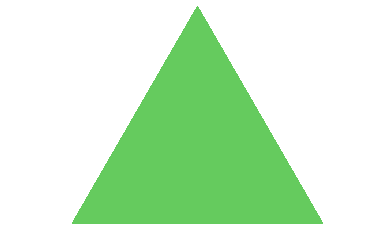

In [17]:
draw_pdf_contours(Dirichlet([1, 1, 1]))

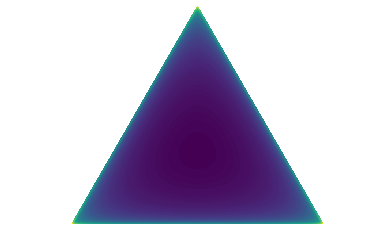

In [18]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

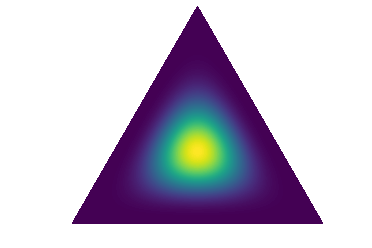

In [19]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

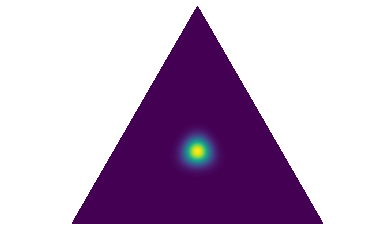

In [20]:
draw_pdf_contours(Dirichlet([50, 50, 50]))

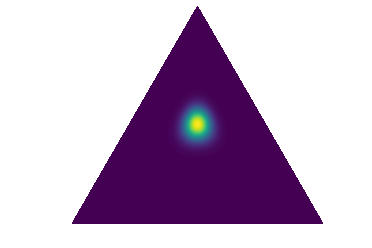

In [21]:
draw_pdf_contours(Dirichlet([30, 30, 50]))

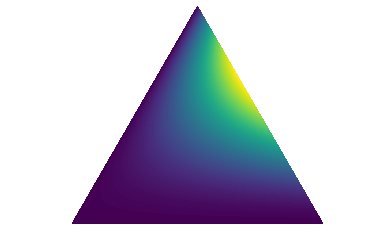

In [22]:
draw_pdf_contours(Dirichlet([1, 2, 3]))

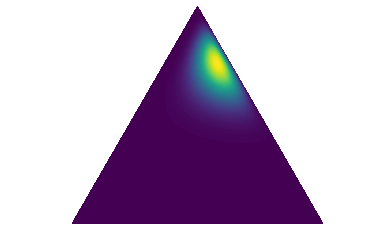

In [23]:
draw_pdf_contours(Dirichlet([2, 5, 15]))